# 🚨 Nigerian Crime Trends Analysis

### Table of Contents
1. Data Importation
2. Data Cleaning
3. Exploratory Data Analysis
4. Feature Engineering
5. Model Training
6. Model Evaluation
7. Model Comparison
8. Hyperparameter Tuning
9. Making and Visualizing Predictions
10. Feature Importance

## Data Importation

In [1]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Import the dataset

df = pd.read_csv("Nigeria_1997-2024_Sep20.csv")

In [17]:
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Refugees/IDPs (Nigeria),6,...,Bolori,11.8826,13.0890,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0,crowd size=no report,1727134598
1,NIG38585,2024-09-20,2024,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Muslim Group (Nigeria),6,...,Ile-Ife,7.4824,4.5603,1,Daily Trust (Nigeria),National,"Around 20 September 2024 (as reported), hundre...",0,crowd size=hundreds,1727134598
2,NIG38581,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),NaN,6,...,Agodi,7.4035,3.9132,1,Daily Post (Nigeria); Guardian (Nigeria); Saha...,National-Regional,"On 19 September 2024, for a second consecutive...",0,crowd size=hundreds,1727134598
3,NIG38588,2024-09-19,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),NaN,1,...,Buruku,10.6179,7.2331,1,Daily Post (Nigeria); Nigeria Punch,National,"Weapons seizure: On 19 September 2024, Police ...",0,NaN,1727134598
4,NIG38591,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),PDP: People's Democratic Party,6,...,Wanno,7.1389,6.5724,1,Vanguard (Nigeria),National,"On 19 September 2024, PDP youths protested at ...",0,crowd size=no report,1727134598


In [18]:
df.shape

(38076, 31)

## Data Cleaning

In [19]:
df.isnull().sum()

,0
event_id_cnty,0
event_date,0
year,0
time_precision,0
disorder_type,0
event_type,0
sub_event_type,0
actor1,0
assoc_actor_1,27877
inter1,0


In [20]:
# Fetch all columns with missing values

missing_cols = []

for col in df.columns:
    if df[col].isnull().sum() > 0:
        missing_cols.append(col)

In [21]:
df[missing_cols].isnull().sum()

,0
assoc_actor_1,27877
actor2,8551
assoc_actor_2,29273
civilian_targeting,23112
admin1,1
admin2,1
admin3,38076
tags,30562


In [22]:
# Drop all columns with missing values except admin1 and admin2

missing_cols.remove('admin1')
missing_cols.remove('admin2')

df.drop(missing_cols, inplace=True, axis=1)

In [23]:
df.shape

(38076, 25)

In [24]:
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,inter1,inter2,...,admin2,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,Maiduguri Metro,Bolori,11.8826,13.0890,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0,1727134598
1,NIG38585,2024-09-20,2024,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,Ife Central,Ile-Ife,7.4824,4.5603,1,Daily Trust (Nigeria),National,"Around 20 September 2024 (as reported), hundre...",0,1727134598
2,NIG38581,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,Ibadan North,Agodi,7.4035,3.9132,1,Daily Post (Nigeria); Guardian (Nigeria); Saha...,National-Regional,"On 19 September 2024, for a second consecutive...",0,1727134598
3,NIG38588,2024-09-19,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),1,4,...,Chikun,Buruku,10.6179,7.2331,1,Daily Post (Nigeria); Nigeria Punch,National,"Weapons seizure: On 19 September 2024, Police ...",0,1727134598
4,NIG38591,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,Etsako East,Wanno,7.1389,6.5724,1,Vanguard (Nigeria),National,"On 19 September 2024, PDP youths protested at ...",0,1727134598


In [25]:
# Drop missing rows in admin1 and admin2

df.dropna(subset=["admin1", "admin2"], inplace=True)

## Exploratory Data Analysis

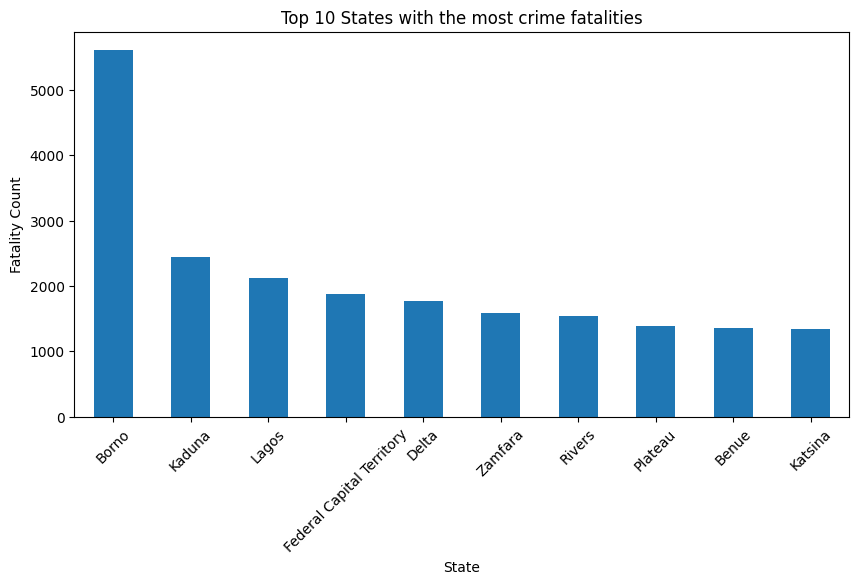

In [26]:
df.groupby('admin1')['fatalities'].agg('count').nlargest(10).plot(kind='bar', figsize=(10, 5))
plt.title("Top 10 States with the most crime fatalities")
plt.xlabel("State")
plt.ylabel("Fatality Count")
plt.xticks(rotation=45)
plt.show()

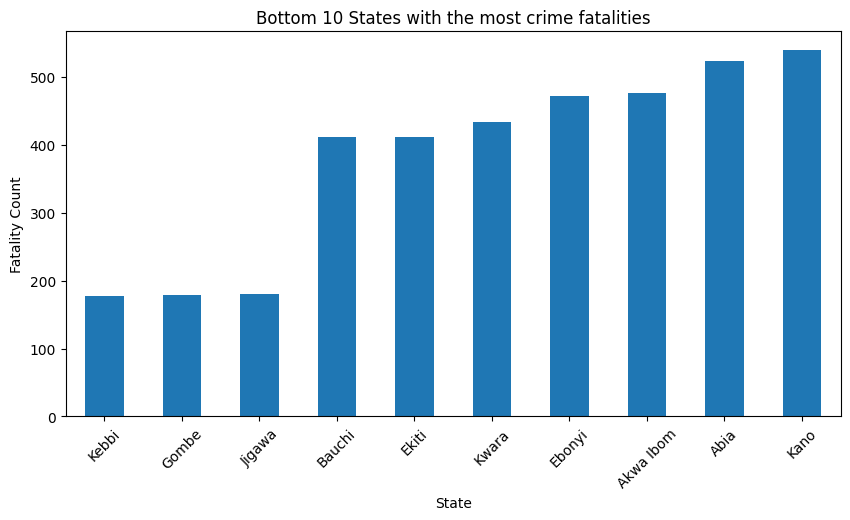

In [27]:
df.groupby('admin1')['fatalities'].agg('count').nsmallest(10).plot(kind='bar', figsize=(10, 5))
plt.title("Bottom 10 States with the most crime fatalities")
plt.xlabel("State")
plt.ylabel("Fatality Count")
plt.xticks(rotation=45)
plt.show()

In [28]:
# Convert event data to date time object and extract month and day

df['event_date'] = pd.to_datetime(df['event_date'])

df['month'] = df['event_date'].dt.month
df['day'] = df['event_date'].dt.day

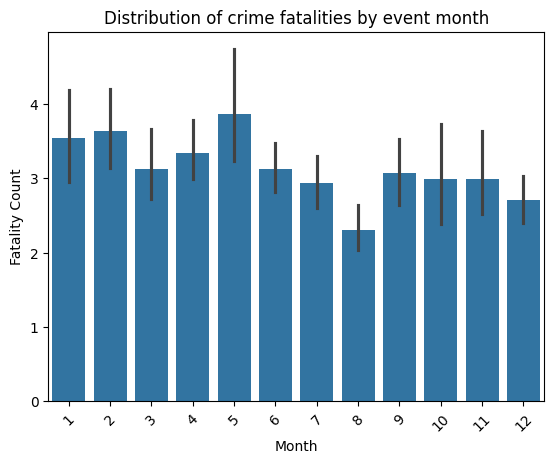

In [29]:
sns.barplot(x='month', y='fatalities', data=df)
plt.title("Distribution of crime fatalities by event month")
plt.xlabel("Month")
plt.ylabel("Fatality Count")
plt.xticks(rotation=45)
plt.show()

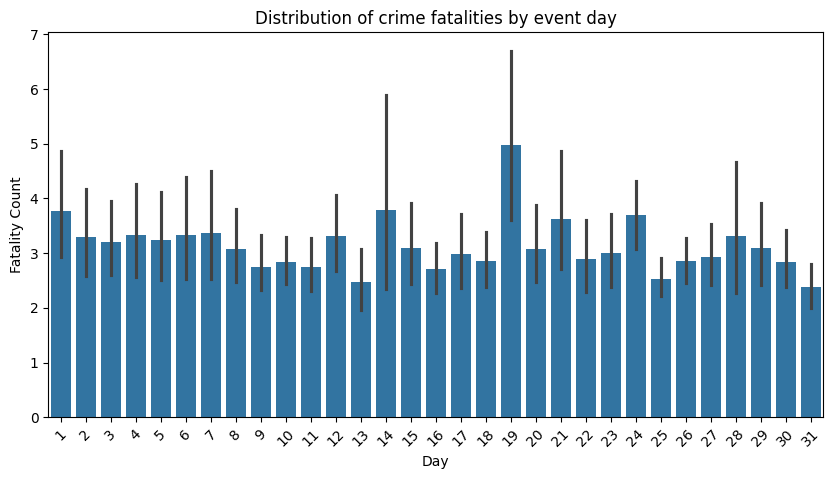

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x='day', y='fatalities', data=df)
plt.title("Distribution of crime fatalities by event day")
plt.xlabel("Day")
plt.ylabel("Fatality Count")
plt.xticks(rotation=45)
plt.show()

In [31]:
df.disorder_type.value_counts()

,count
disorder_type,
Political violence,27020
Demonstrations,9051
Strategic developments,1814
Political violence; Demonstrations,190


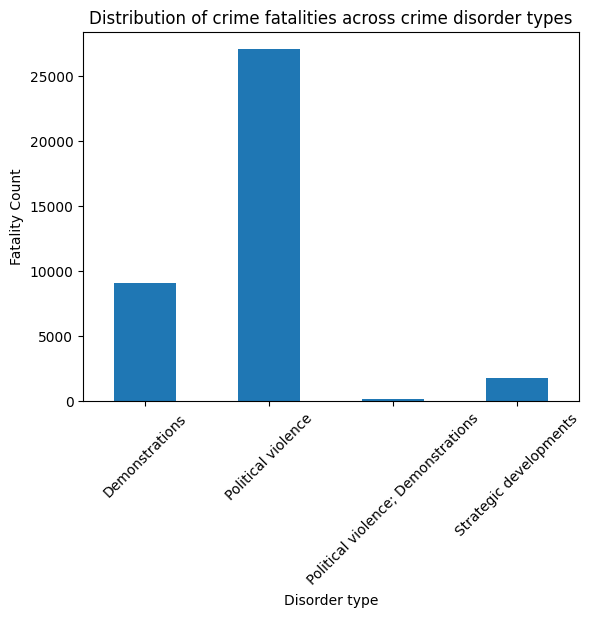

In [32]:
df.groupby('disorder_type')['fatalities'].agg('count').plot(kind='bar')
plt.title("Distribution of crime fatalities across crime disorder types")
plt.xlabel("Disorder type")
plt.ylabel("Fatality Count")
plt.xticks(rotation=45)
plt.show()

## Feature Engineering

In [33]:
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,inter1,inter2,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,month,day
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,11.8826,13.0890,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0,1727134598,9,20
1,NIG38585,2024-09-20,2024,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,7.4824,4.5603,1,Daily Trust (Nigeria),National,"Around 20 September 2024 (as reported), hundre...",0,1727134598,9,20
2,NIG38581,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,7.4035,3.9132,1,Daily Post (Nigeria); Guardian (Nigeria); Saha...,National-Regional,"On 19 September 2024, for a second consecutive...",0,1727134598,9,19
3,NIG38588,2024-09-19,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),1,4,...,10.6179,7.2331,1,Daily Post (Nigeria); Nigeria Punch,National,"Weapons seizure: On 19 September 2024, Police ...",0,1727134598,9,19
4,NIG38591,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,7.1389,6.5724,1,Vanguard (Nigeria),National,"On 19 September 2024, PDP youths protested at ...",0,1727134598,9,19


In [34]:
# Drop unnecessary columns
df.drop(['event_id_cnty', 'event_date', 'time_precision', 'month', 'day', 'notes', 'timestamp', 'geo_precision', 'iso', 'region', 'country', 'source', 'actor1'], axis=1, inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
# Encode categorical columns

obj_cols = df.select_dtypes(exclude=np.number).columns

for col in obj_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Split the dataset into test and train sets

X = df.drop(['fatalities'], axis=1)
y = df['fatalities']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26652, 13), (11423, 13), (26652,), (11423,))

## Model Training

Experimenting with below regression models

1. Linear Regression
2. Random Forest Regressor
3. SGD Regressor

In [40]:
# Import the linear regression model
from sklearn.linear_model import LinearRegression

# Instantiate the model
model_lr = LinearRegression()

# Fit the model to train data
model_lr.fit(X_train, y_train)

LinearRegression()

In [41]:
# Import the Random forest regressor model
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
model_rf_reg = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model to train data
model_rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [42]:
# Import the SGD regression model
from sklearn.linear_model import SGDClassifier

# Instantiate the model
model_sgd = SGDClassifier()

# Fit the model to train data
model_sgd.fit(X_train, y_train)

SGDClassifier()

In [43]:
# Import the Ridge regression model
from sklearn.linear_model import Ridge

# Instantiate the model
model_ridge = Ridge(alpha=0.5)

# Fit the model to train data
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

## Model Evaluation

In [44]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

def show_scores(model, X_train, X_test, y_train, y_test):
    """
    Evaluate model performance.

    Args:
        model: The regression model.
        X_train: Training data.
        X_test: Validation data.
        y_train: True values for training.
        y_test: True values for validation.

    Returns:
        A dictionary of scores (MAE, MSE, R^2) for training and validation.
    """
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)

    scores = {
        "Train MAE": mean_absolute_error(y_train, train_preds),
        "Test MAE": mean_absolute_error(y_test, val_preds),
        "Train MSE": mean_squared_error(y_train, train_preds),
        "Test MSE": mean_squared_error(y_test, val_preds),
        "Train R^2": r2_score(y_train, train_preds),
        "Test R^2": r2_score(y_test, val_preds)
    }
    return scores

In [45]:
# Check the scores for Linear regression model
lr_scores = show_scores(model=model_lr,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test)
lr_scores

{'Train MAE': 4.13052529825337,
 'Test MAE': 4.143151355516224,
 'Train MSE': 210.400402755049,
 'Test MSE': 210.78703346412223,
 'Train R^2': 0.04878966032007204,
 'Test R^2': 0.048331489961698115}

In [46]:
# Check the scores for Random Forest model
rf_reg_scores = show_scores(model=model_rf_reg,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test)
rf_reg_scores

{'Train MAE': 1.4731162830106188,
 'Test MAE': 3.5544377117033847,
 'Train MSE': 39.937815848217504,
 'Test MSE': 222.51294317431245,
 'Train R^2': 0.81944301017672,
 'Test R^2': -0.004609048359601298}

In [47]:
# Check the scores for SGD classifier model
sgd_scores = show_scores(model=model_sgd,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)
sgd_scores

{'Train MAE': 3.225499024463455,
 'Test MAE': 3.2484461174822727,
 'Train MSE': 224.85659612787032,
 'Test MSE': 227.47745776065833,
 'Train R^2': -0.016566111002519257,
 'Test R^2': -0.027023008657853564}

In [48]:
# Check the scores for Ridge classifier model
ridge_scores = show_scores(model=model_ridge,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
ridge_scores

{'Train MAE': 4.130521679136756,
 'Test MAE': 4.143147568703856,
 'Train MSE': 210.40040275622525,
 'Test MSE': 210.7870330142635,
 'Train R^2': 0.04878966031475429,
 'Test R^2': 0.048331491992735676}

## Model Comparison

In [49]:
# Function to compare the performance scores of models

def plot_model_comparison(scores_list):
    """
    Create a bar plot for comparing model performance metrics.

    Args:
        scores_list: List of dictionaries containing model scores.
        title: Title of the plot.
    """
    # Extract metric names from the first score dictionary
    metric_names = list(scores_list[0].keys())

    # Prepare data for plotting
    scores_matrix = np.array([[scores[metric] for metric in metric_names] for scores in scores_list])

    # Set up bar width and positions
    bar_width = 0.2
    x = np.arange(len(metric_names))

    # Create the bar plot
    for i, model_scores in enumerate(scores_matrix):
        plt.bar(x + i * bar_width, model_scores, width=bar_width, label=f'Model {i + 1}')

    # Customize the plot
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title("Model Performance Comparison")
    plt.xticks(x + bar_width * (len(scores_list) - 1) / 2, metric_names)
    plt.legend(title='Models')
    plt.tight_layout()
    plt.show()

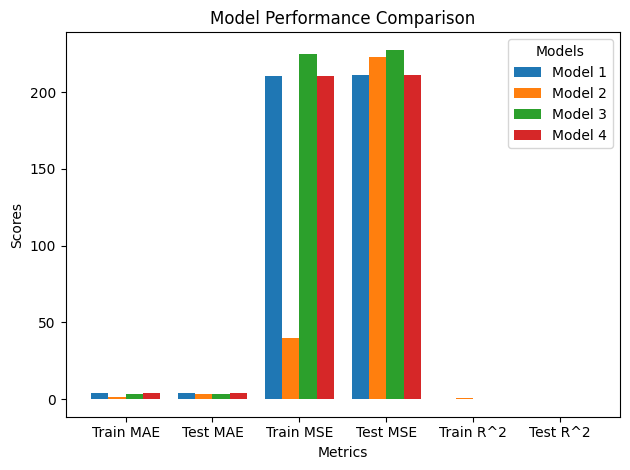

In [50]:
# Plot model scores
plot_model_comparison([lr_scores, rf_reg_scores, sgd_scores, ridge_scores])

+ `Model 2` the `Random Forest Regressor` seems to offer the best balance with low MSE and MAE values, suggesting better prediction accuracy with minimal errors.
+ `Model 3` has the highest error (MSE) and doesn't seem to perform well, even though its R² is marginally better.
+ All models struggle in terms of R², which implies they do not explain much of the variance in the data.

## Hyperparameter tuning

As the model-2 **Random Forest Regressor** performed the best out of all 4 models, let's hyperparameter tune it, to hopefully increase its performance.

In [53]:
rf_reg_scores

{'Train MAE': 1.4731162830106188,
 'Test MAE': 3.5544377117033847,
 'Train MSE': 39.937815848217504,
 'Test MSE': 222.51294317431245,
 'Train R^2': 0.81944301017672,
 'Test R^2': -0.004609048359601298}

### Hyperparameter tuning with RandomizedSearchCV

In [63]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Initialize RandomizedSearchCV model
rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                              param_distributions=rf_grid,
                              n_iter=10,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearch model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

CPU times: user 50.8 s, sys: 650 ms, total: 51.5 s
Wall time: 34.2 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [64]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 14,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [65]:
# Evaluate the RandomizedSearchCV
rs_scores = show_scores(rs_model, X_train, X_test, y_train, y_test)
rs_scores

{'Train MAE': 2.9575286826464944,
 'Test MAE': 3.3126221527568998,
 'Train MSE': 164.27246520754576,
 'Test MSE': 188.9663167171513,
 'Train R^2': 0.2573318996349734,
 'Test R^2': 0.14684840845181102}

In [66]:
rf_reg_scores

{'Train MAE': 1.4731162830106188,
 'Test MAE': 3.5544377117033847,
 'Train MSE': 39.937815848217504,
 'Test MSE': 222.51294317431245,
 'Train R^2': 0.81944301017672,
 'Test R^2': -0.004609048359601298}

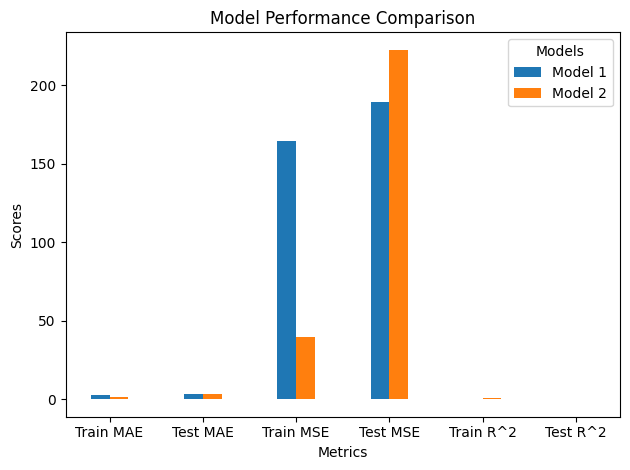

In [67]:
plot_model_comparison([rs_scores, rf_reg_scores])

**Comapring the below models:**

+ `rs_model:` Randomized Search Random Forest Regressor
+ `rf_reg_model:` Random Forest Regressor (Default Parameters)


The performance of **rs_model** on the test set is consistent with the training set, which means the model is generalizing well. Even though the training performance isn't as strong as **rf_reg_model**, this model avoids overfitting and is more suitable.

From the above graph it is evident how **rf_reg_model** has lower MSE on train data as compared to the **rs_model** but it's MSE rises really high on test data, showing the model is overfit.

## Making and Visualizing Predictions

In [74]:
X_test.head()

,year,disorder_type,event_type,sub_event_type,inter1,inter2,interaction,admin1,admin2,location,latitude,longitude,source_scale
19196,2020,0,2,17,6,0,60,28,579,3894,7.0932,4.8353,0
33361,2013,1,5,5,2,7,27,7,504,3385,12.3377,14.1805,0
1682,2024,0,2,17,6,0,60,36,247,1739,12.1628,6.6614,3
21428,2020,1,5,5,4,7,47,24,47,381,6.4699,3.2958,3
20399,2020,1,1,2,1,2,12,7,488,816,12.9393,13.9082,3


In [69]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11423 entries, 19196 to 37447
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            11423 non-null  int64  
 1   disorder_type   11423 non-null  int64  
 2   event_type      11423 non-null  int64  
 3   sub_event_type  11423 non-null  int64  
 4   inter1          11423 non-null  int64  
 5   inter2          11423 non-null  int64  
 6   interaction     11423 non-null  int64  
 7   admin1          11423 non-null  int64  
 8   admin2          11423 non-null  int64  
 9   location        11423 non-null  int64  
 10  latitude        11423 non-null  float64
 11  longitude       11423 non-null  float64
 12  source_scale    11423 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.2 MB


In [70]:
# Make predictions on the test data with rs_model - Hyperparameter tuned model
test_preds = rs_model.predict(X_test)
test_preds

array([ 0.        , 21.50791937,  0.        , ...,  0.04259259,
        3.996424  , 29.01225372])

In [72]:
len(test_preds), len(X_test)

(11423, 11423)

In [80]:
# Print first 10 true values
list(y_test[:10])

[0, 4, 0, 2, 3, 0, 0, 1, 4, 2]

In [83]:
# Print first 10 prediction values
np.round(test_preds[:10])

array([ 0., 22.,  0.,  1.,  8.,  0.,  0.,  1.,  4.,  5.])

## Feature Importance

Feature importance helps us identify which different attributes of the data are most important when it comes to predicting the **target variable** (Fatalaties)

In [96]:
# Find feature importance for our best model
best_model = rs_model.best_estimator_

feature_importance = best_model.feature_importances_
feature_importance

array([0.22520807, 0.00508425, 0.05664662, 0.04495934, 0.0343933 ,
       0.0306461 , 0.03502766, 0.02142287, 0.0594678 , 0.10674447,
       0.16519309, 0.13137171, 0.08383473])

In [93]:
# Get feature names
feature_names = X_train.columns
print(f"Features: \n\n{feature_names}")

Features: 

Index(['year', 'disorder_type', 'event_type', 'sub_event_type', 'inter1',
       'inter2', 'interaction', 'admin1', 'admin2', 'location', 'latitude',
       'longitude', 'source_scale'],
      dtype='object')


### Plotting Feature Importance

In [98]:
# Function for plotting feature importance
def plot_features(columns, importances, n=30):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

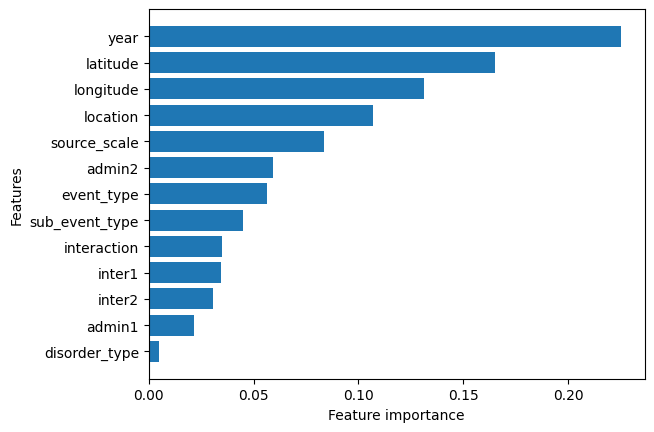

In [99]:
plot_features(feature_names, feature_importance)

+ The top 4 features *(Year, Latitude, Longitude, Location)* have the most feature importance and contribute the most in predictions.


+ The features at the bottom of the chart, like Disorder Type , might not significantly contribute to the model's prediction and can be removed from the data for simplicity.